In [1]:
import sys
import os
import json
import numpy as np

import torch 
torch.cuda.empty_cache()

sys.path.append(os.path.abspath('..'))
sys.path.append(os.path.abspath('../models'))
sys.path.append(os.path.abspath('../dataset_generation'))

from NN_TopOpt import SIMP_basic
from TopOpt import TopOptimizer2D
import yaml

methods = {
    "simp_basic": SIMP_basic,
}

Info    : Reading '../test_problems/cantilever_beam_high_resolution.msh'...
Info    : 9 entities
Info    : 7142 nodes
Info    : 13942 elements
Info    : Done reading '../test_problems/cantilever_beam_high_resolution.msh'
Compute areas ...


100%|██████████| 13942/13942 [00:00<00:00, 230194.45it/s]


Whole area 0.15


100%|██████████| 13942/13942 [00:00<00:00, 24760.16it/s]


Fixed case:  fixed_xy [0, [0, 0.6]] 121 7142
Loaded loads:  (10,)
check dv 0 0.7172877127342713
Build filter matrix ...


Computing stresses: 100%|██████████| 13942/13942 [00:00<00:00, 115083.86it/s]


0.09848879258031677 0.008994791898238482


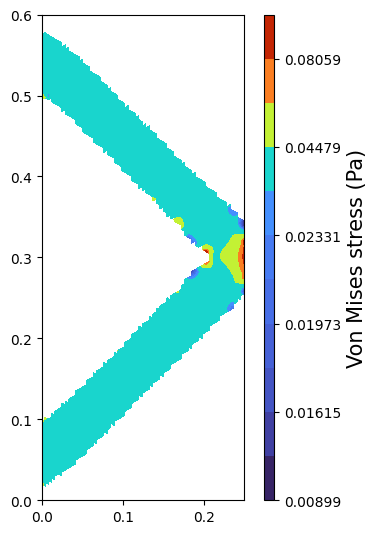

vf: 0.254910 | compliance: 0.000041 | max_stress: 0.131561


(0.2549096024435477, 4.081923670101164e-05, 0.13156059990833943)

In [7]:
# external_method = "treetop"
external_method = "ntopo"

experiment_dir = f'../configs/NN_top_optimization/{external_method}'

if external_method == "treetop":
    v_flopping = False
else:
    v_flopping = True

# select config
# config_name = "MBB_beam_half" #
config_name = "Cant_beam"
# config_name = "Cant_beam_distrL"

# config_name = "Square_beam"
# config_name = "Square_cantilever_beam"

###########################################################################################

config_path = f"{experiment_dir}/{config_name}.yaml"

with open(config_path, 'r') as file:
    config = yaml.safe_load(file)

params = config['params']
TopOptimizer = TopOptimizer2D(methods, params)
# /ntopo_Cant_beam.npy
# TopOptimizer.load_solution_from_2d_tensor("../src/external_solutions/ntopo.npy", v_flopping=True)``
TopOptimizer.load_solution_from_2d_tensor(f'../src/model_comparison/external_solutions/{external_method}_{config_name}.npy',
                                          v_flopping=v_flopping, k=10)
TopOptimizer.print_metrics()
# TopOptimizer.optimize(plot_interval=20)

0.09848879258031677 0.008994791898238482


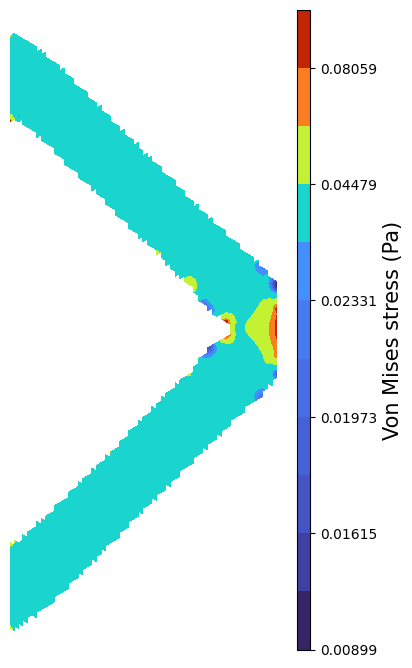

vf: 0.254910 | compliance: 0.000041 | max_stress: 0.131561


In [8]:
# geometry_features = TopOptimizer.method.gaussian_core.get_geometry()

gray = False

root_dir = f'../src/model_comparison/{external_method}'
os.makedirs(root_dir, exist_ok=True)

if gray:
    filename = f"{root_dir}/{config_name}_{external_method}_gray.png"
    TopOptimizer.plot_final_result(filename=filename, plot_von_mises=not gray)
else:
    filename = f"{root_dir}/{config_name}.png"
    TopOptimizer.plot_final_result(filename=filename, plot_von_mises=True)

vf, compliance, max_stress = TopOptimizer.print_metrics()
metrics = {
    "vf": vf,
    "compliance": compliance,
    "max_stress": max_stress
}
filename_metrics = f"{root_dir}/{config_name}.json"
with open(filename_metrics, "w") as f:
    json.dump(metrics, f)

## Import diffusion solution

In [15]:
task_id = 3

task2config = {
    1: "Square_beam",
    2: "Square_beam_distrL",
    3: "Square_cantilever_beam",
}


batches = np.load(f"../src/model_comparison/diffusion_solutions/task{task_id}_16x64x64x1.npz")
arr = batches['arr_0'].squeeze()
# print(arr.shape)

for i in range(arr.shape[0]):
    solution = arr[i]/255.0
    solution = 1 - solution
    solution = solution.reshape(64, 64)
    # print(solution.shape)

    np.save(f"../src/model_comparison/diffusion_solutions/{task2config[task_id]}_{i}.npy", solution)


Square_cantilever_beam
Info    : Reading '../test_problems/Square_cantilever_beam.msh'...
Info    : 9 entities
Info    : 5381 nodes
Info    : 10492 elements
Info    : Done reading '../test_problems/Square_cantilever_beam.msh'
Compute areas ...


100%|██████████| 10492/10492 [00:00<00:00, 222096.46it/s]


Whole area 1.0


100%|██████████| 10492/10492 [00:00<00:00, 21205.87it/s]


Fixed case:  fixed_xy [0, [0, 1]] 68 5381
Loaded loads:  (4,)
check dv 0 0.8007118455937392
Build filter matrix ...


Computing stresses: 100%|██████████| 10492/10492 [00:00<00:00, 120027.81it/s]

28.781554332263752 0.9774830923182031


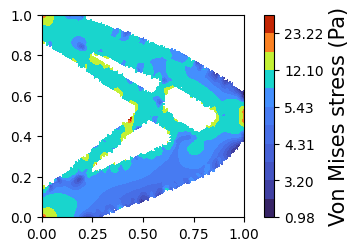

vf: 0.430595 | compliance: 16.795825 | max_stress: 44.208100


(0.43059473961344535, 16.795824598302865, 44.208100418404605)

In [16]:
sol_id = 5
external_method = "diffusion"

experiment_dir = f'../configs/NN_top_optimization/{external_method}'

# select config\

config_name = task2config[task_id]
print(config_name)
config_path = f"{experiment_dir}/{config_name}.yaml"

with open(config_path, 'r') as file:
    config = yaml.safe_load(file)

params = config['params']
TopOptimizer = TopOptimizer2D(methods, params)
# /ntopo_Cant_beam.npy
# TopOptimizer.load_solution_from_2d_tensor("../src/external_solutions/ntopo.npy", v_flopping=True)``
TopOptimizer.load_solution_from_2d_tensor(f'../src/model_comparison/diffusion_solutions/{task2config[task_id]}_{sol_id}.npy',
                                          v_flopping=True, k=8)
TopOptimizer.print_metrics()
# TopOptimizer.optimize(plot_interval=20)

28.781554332263752 0.9774830923182031


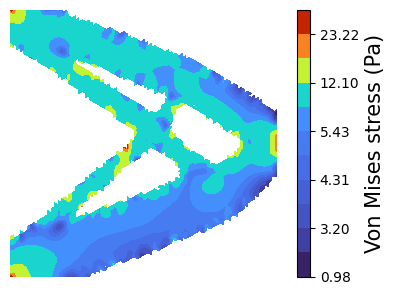

In [17]:
gray = False

root_dir = f'../src/model_comparison/{external_method}'
os.makedirs(root_dir, exist_ok=True)

if gray:
    filename = f"{root_dir}/{config_name}_{external_method}_gray.png"
    TopOptimizer.plot_final_result(filename=filename, plot_von_mises=not gray)
else:
    filename = f"{root_dir}/{config_name}.png"
    TopOptimizer.plot_final_result(filename=filename, plot_von_mises=True)

Computing stresses: 100%|██████████| 10492/10492 [00:00<00:00, 115994.06it/s]


138.09823586840355 0.010163004330617242


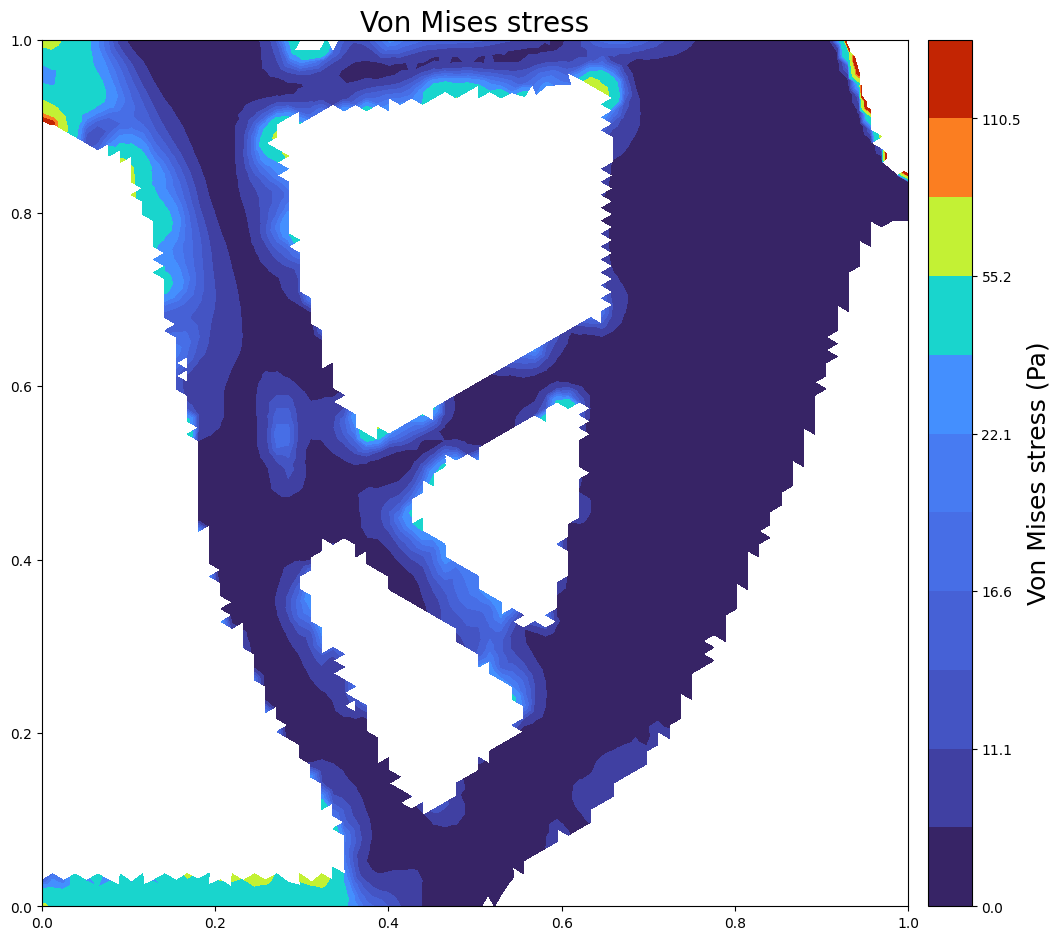

vf: 0.420132 | compliance: 55.360285 | max_stress: 19306.489989


Computing stresses: 100%|██████████| 10492/10492 [00:00<00:00, 116169.21it/s]


87.36221091674241 0.0015693935020322008


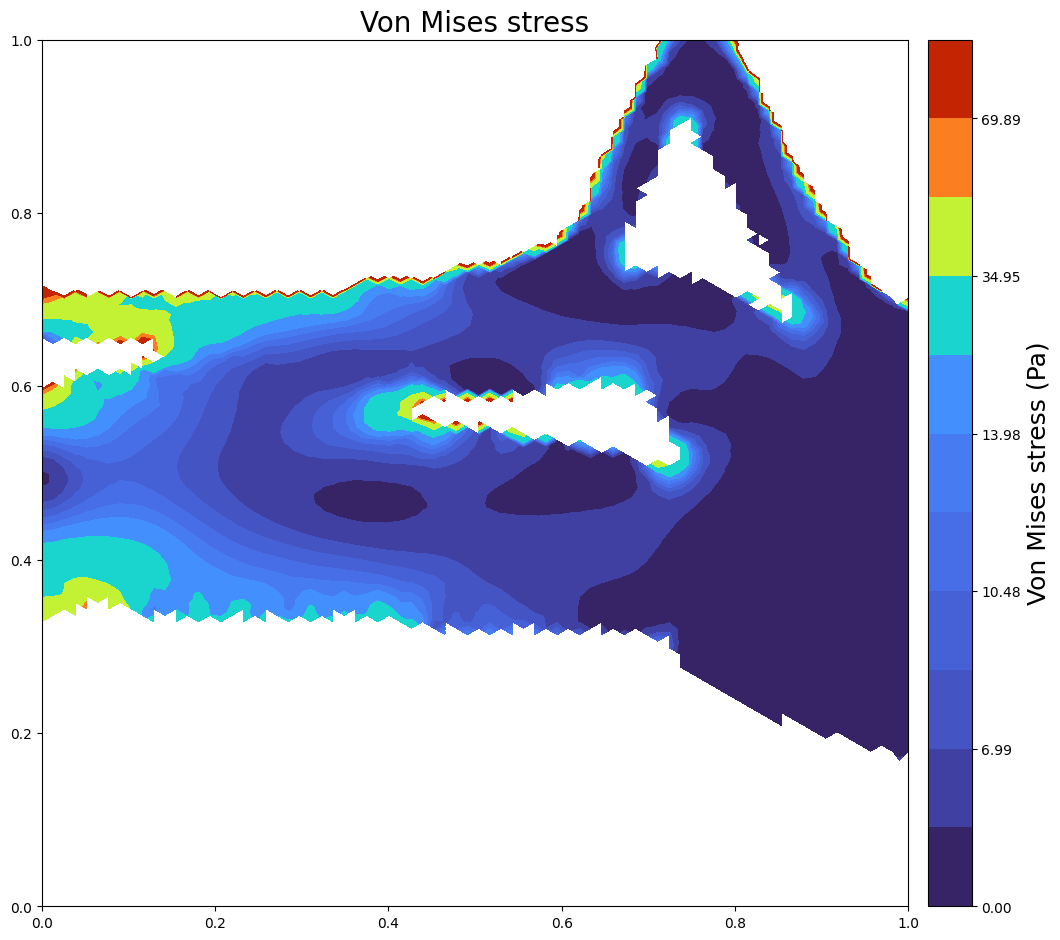

vf: 0.415410 | compliance: 1271.457206 | max_stress: 20919.231383


Computing stresses: 100%|██████████| 10492/10492 [00:00<00:00, 116346.11it/s]


102.51322183423524 0.015242625879493347


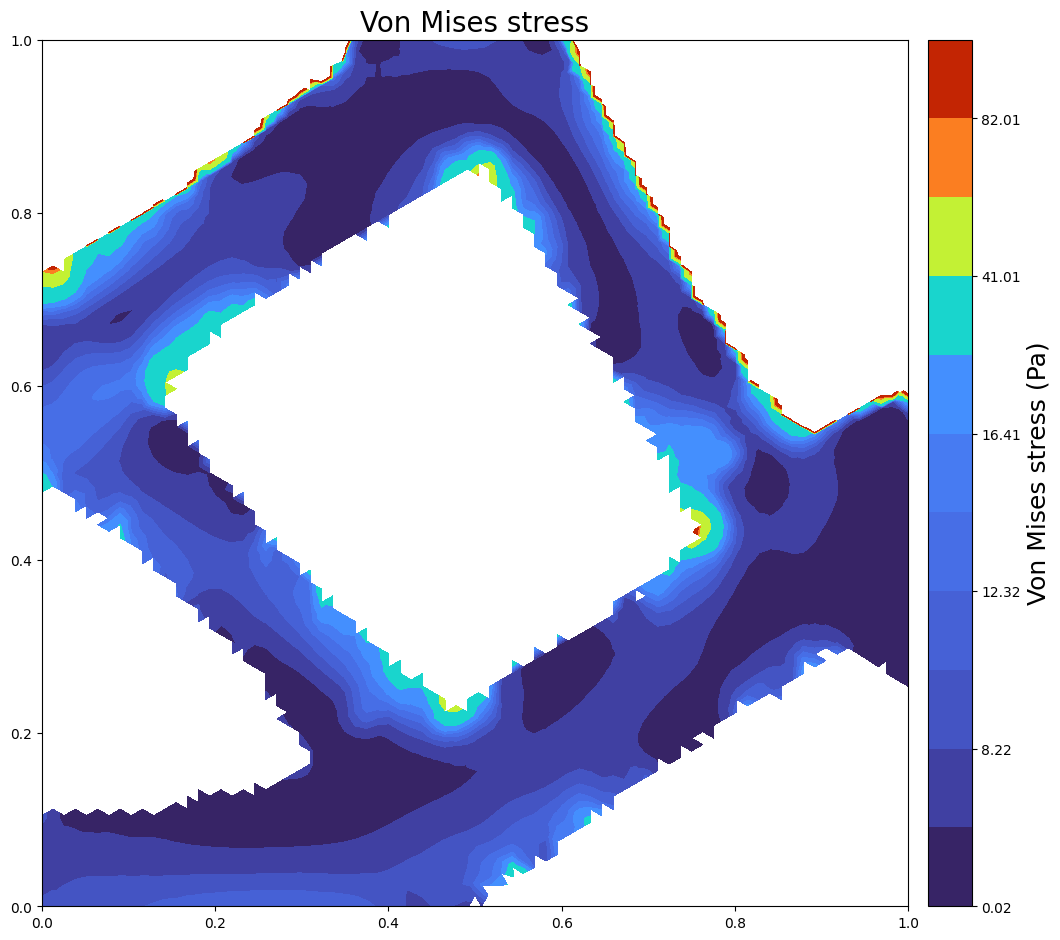

vf: 0.418317 | compliance: 1103.886844 | max_stress: 23836.945023


Computing stresses: 100%|██████████| 10492/10492 [00:00<00:00, 116073.91it/s]


78.33896250771588 6.842041438054398e-05


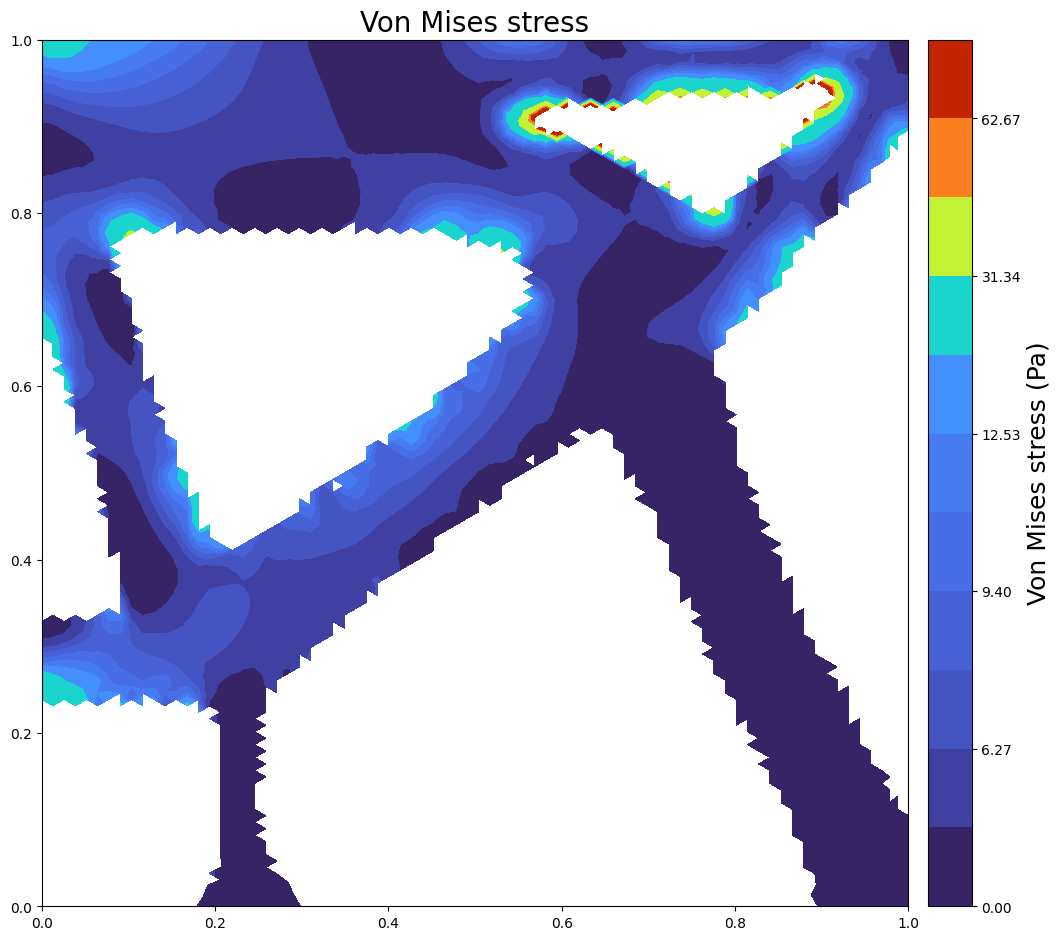

vf: 0.418574 | compliance: 11.722081 | max_stress: 453.223723


Computing stresses: 100%|██████████| 10492/10492 [00:00<00:00, 116891.26it/s]


89.11765632038784 0.16500947231552685


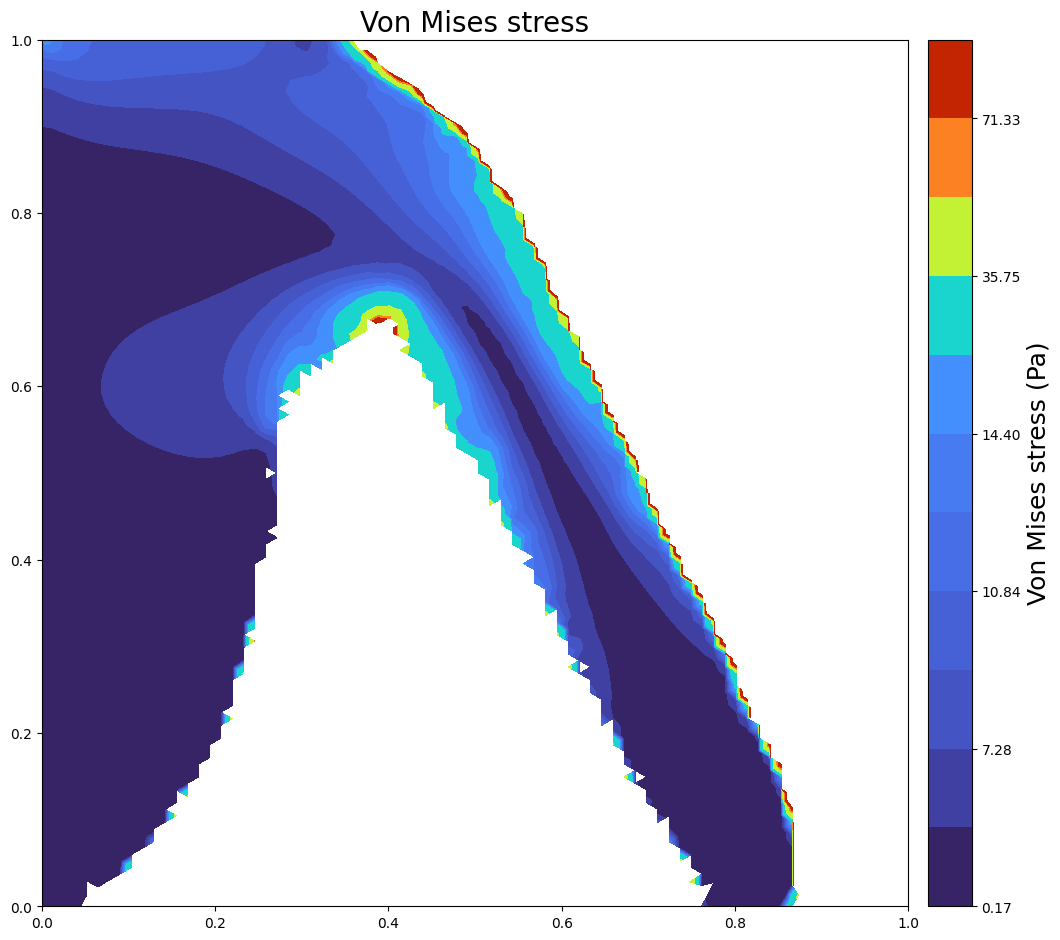

vf: 0.421654 | compliance: 2060.291128 | max_stress: 19195.254416


Computing stresses: 100%|██████████| 10492/10492 [00:00<00:00, 117619.52it/s]


24.790291401329178 0.01548101848894171


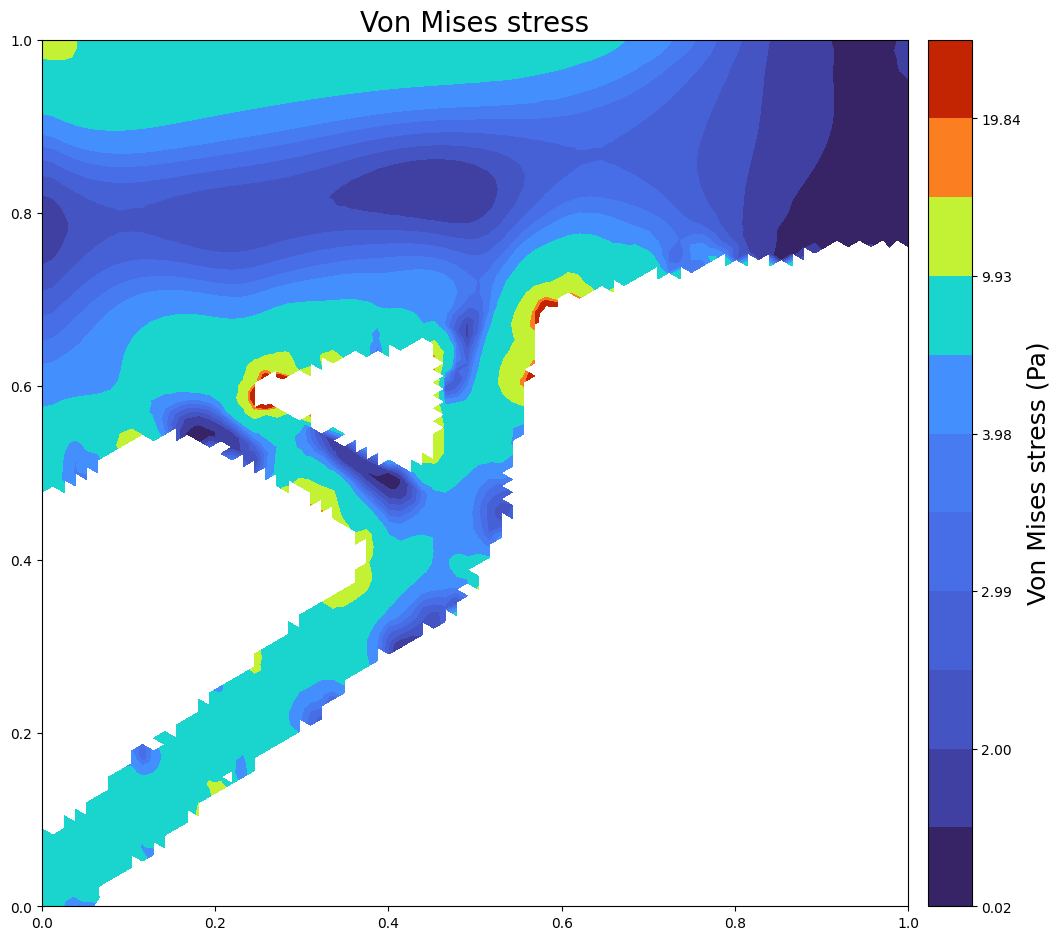

vf: 0.422901 | compliance: 7.179869 | max_stress: 65.202077


Computing stresses: 100%|██████████| 10492/10492 [00:00<00:00, 117664.81it/s]


123.50331494446748 0.00367688219467832


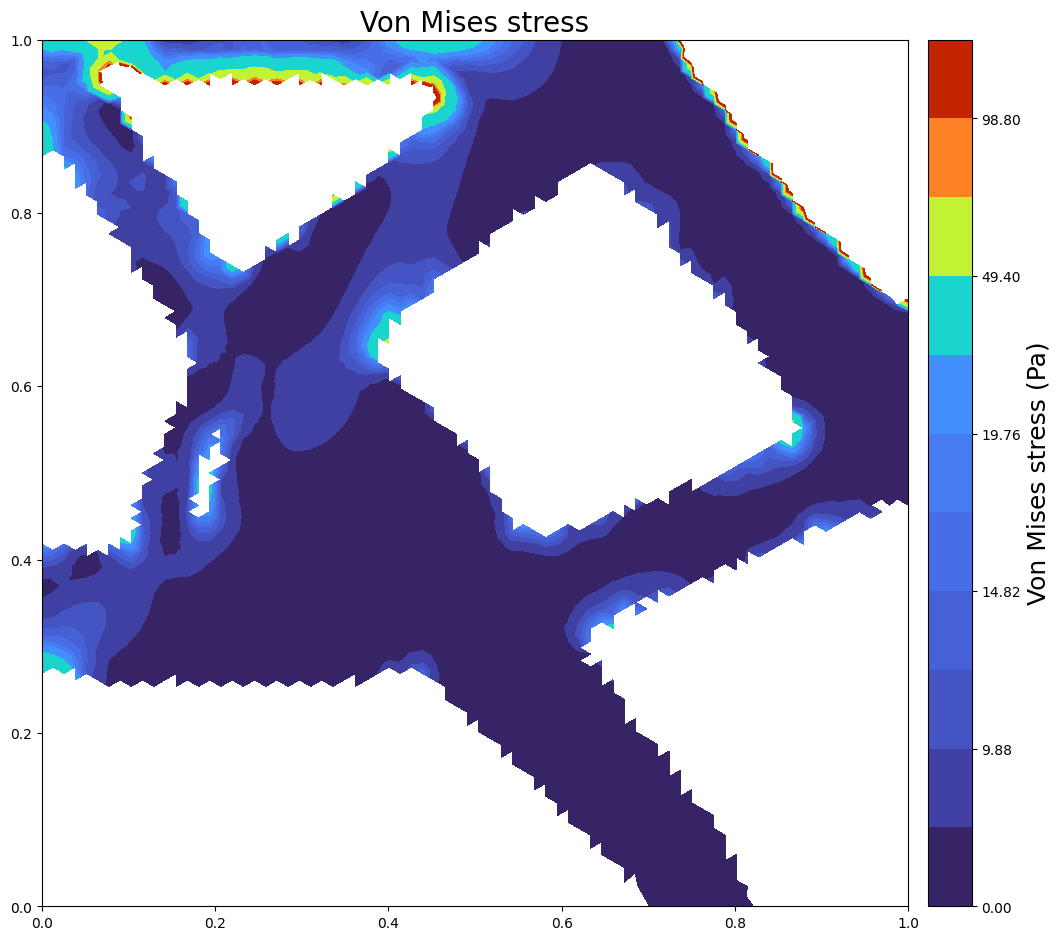

vf: 0.418553 | compliance: 365.884641 | max_stress: 19221.715457


Computing stresses: 100%|██████████| 10492/10492 [00:00<00:00, 114123.03it/s]


80.8435674882399 0.0005843575219677931


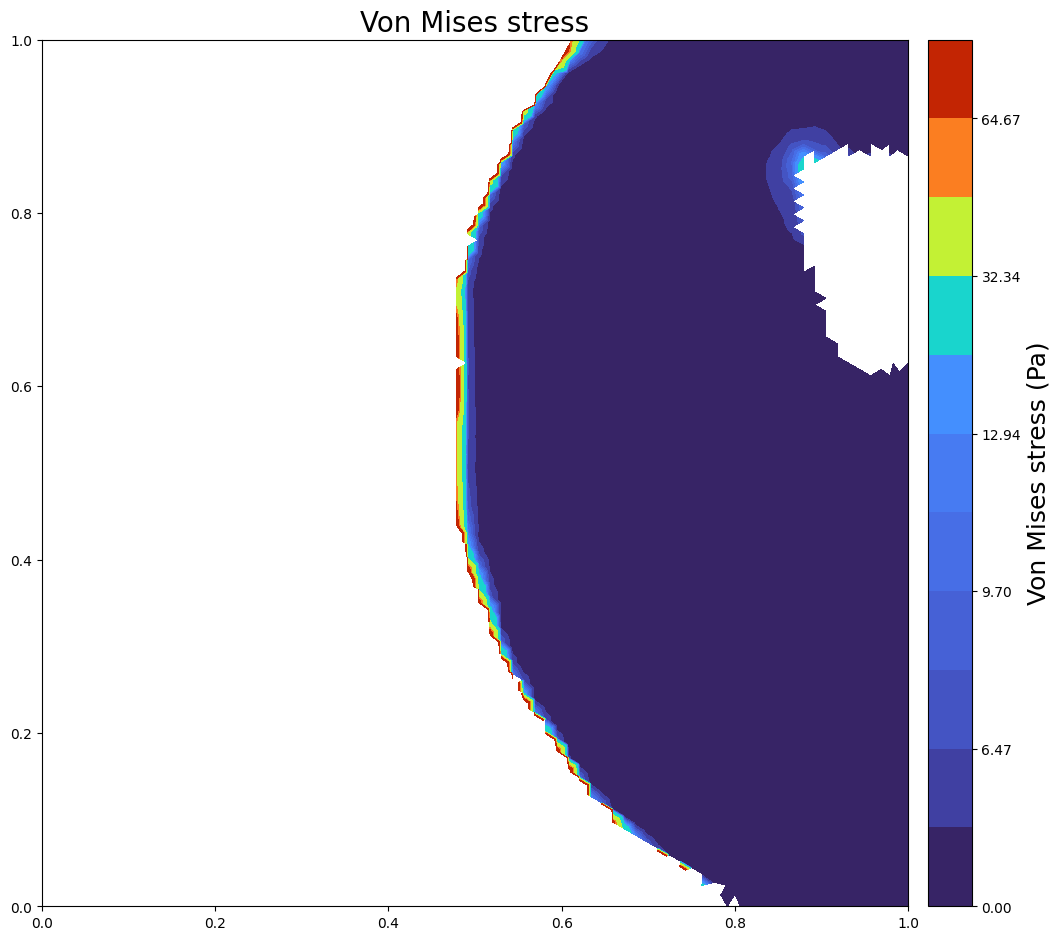

vf: 0.420754 | compliance: 14979.728379 | max_stress: 97392.410336


Computing stresses: 100%|██████████| 10492/10492 [00:00<00:00, 114888.14it/s]


164.79585429956668 0.00018722223414640202


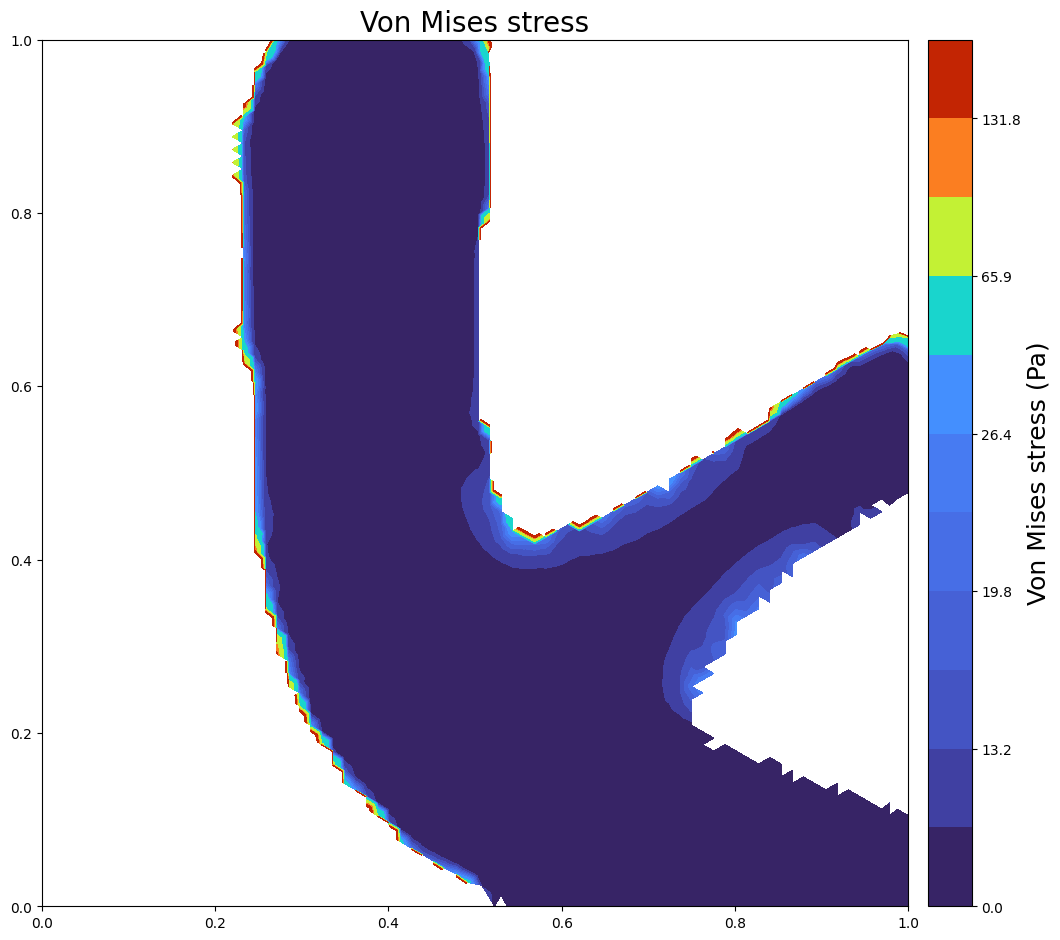

vf: 0.420466 | compliance: 10539.940735 | max_stress: 89236.517676


Computing stresses: 100%|██████████| 10492/10492 [00:00<00:00, 117613.23it/s]


179.95064061976515 0.05610119843402651


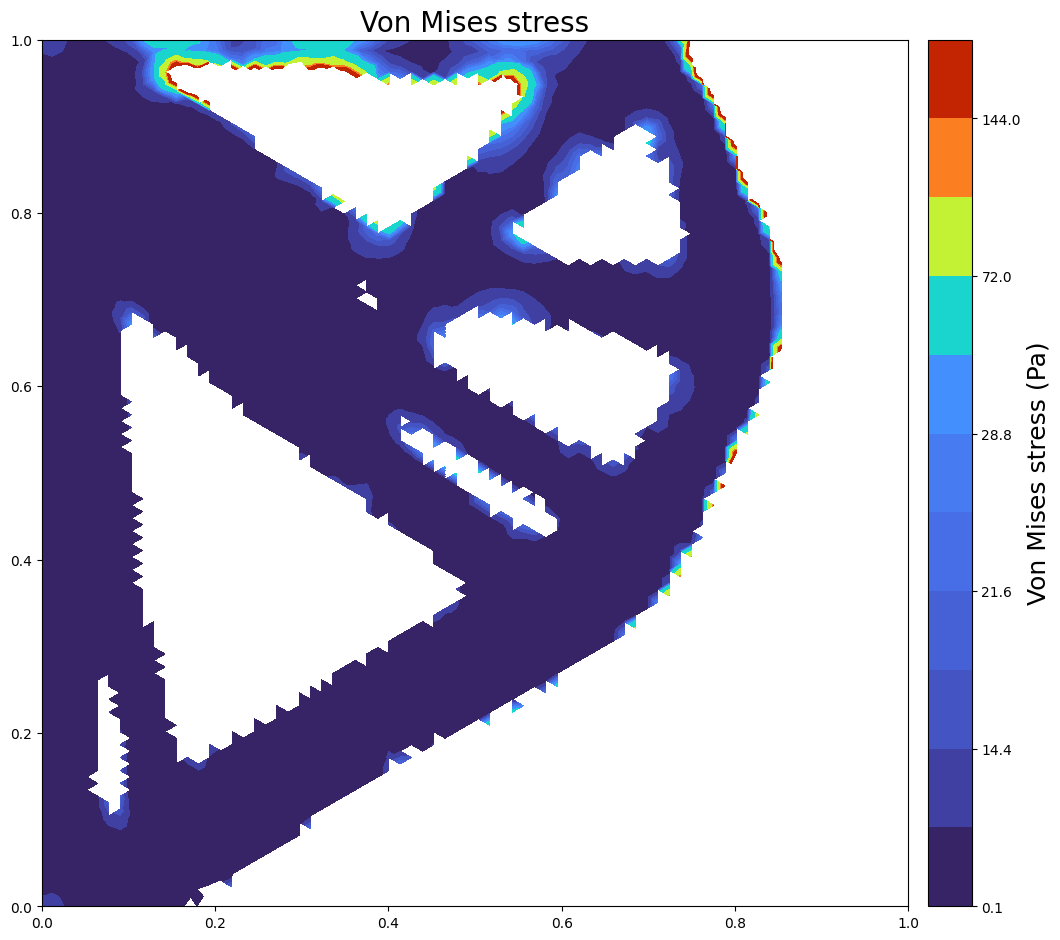

vf: 0.420511 | compliance: 460.084582 | max_stress: 22289.579416


Computing stresses: 100%|██████████| 10492/10492 [00:00<00:00, 118989.28it/s]


317.47618102046886 0.013485031470381652


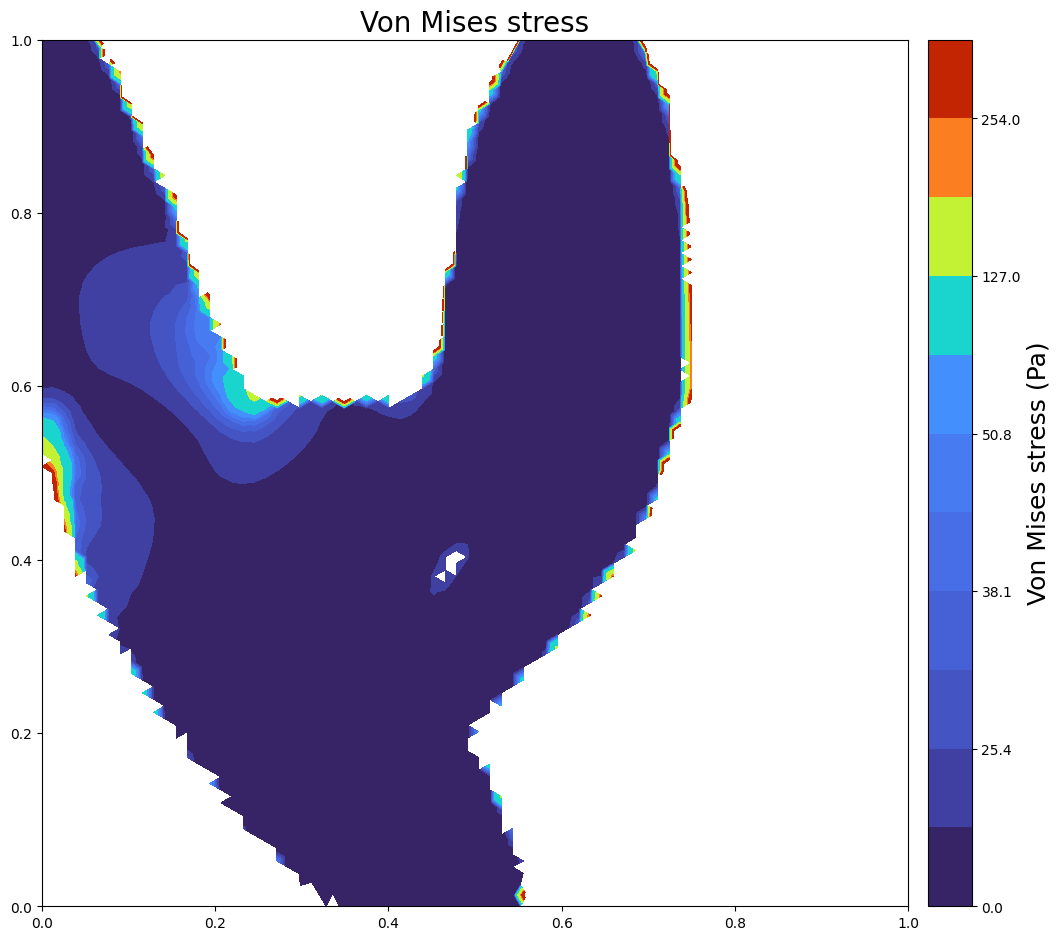

vf: 0.434304 | compliance: 1326.801564 | max_stress: 29290.802517


Computing stresses: 100%|██████████| 10492/10492 [00:00<00:00, 107976.91it/s]


354.2387788016042 0.011465101519535979


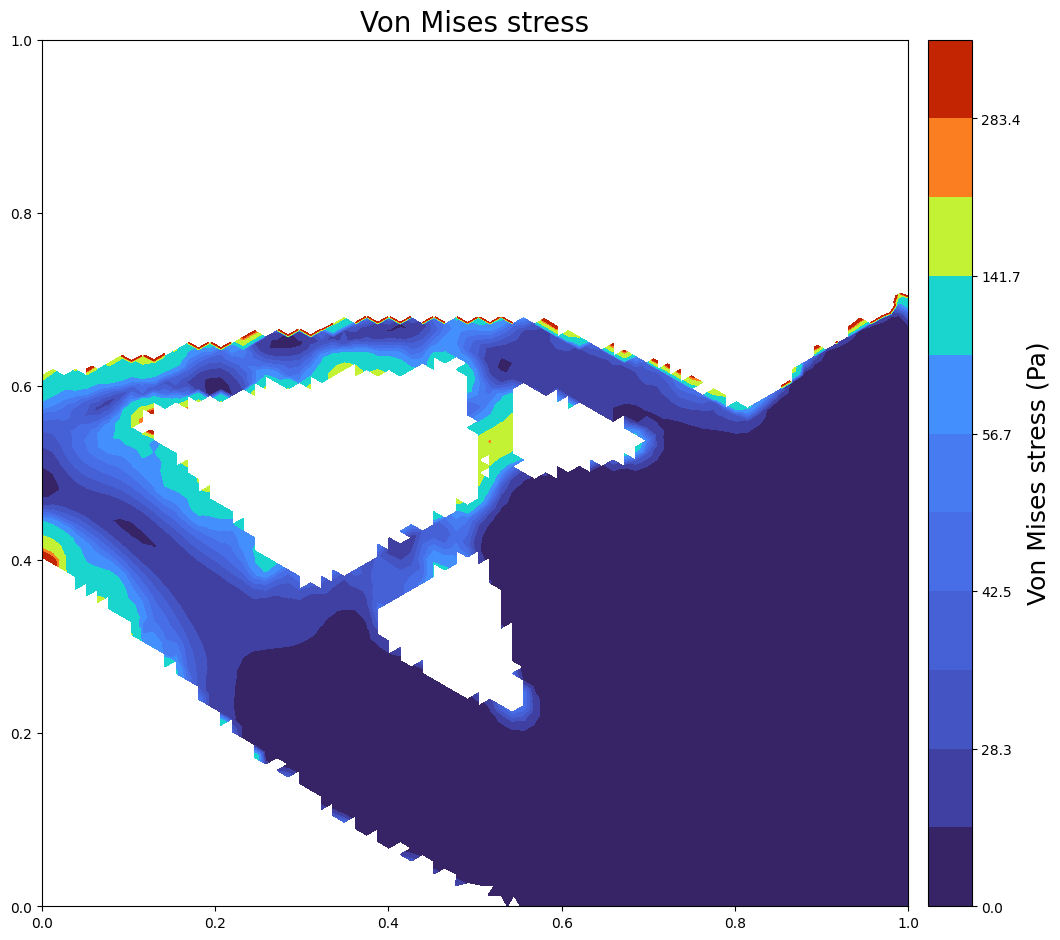

vf: 0.426099 | compliance: 2485.033627 | max_stress: 29652.460093


Computing stresses: 100%|██████████| 10492/10492 [00:00<00:00, 115499.65it/s]


93.54294507493705 0.0006391400637834171


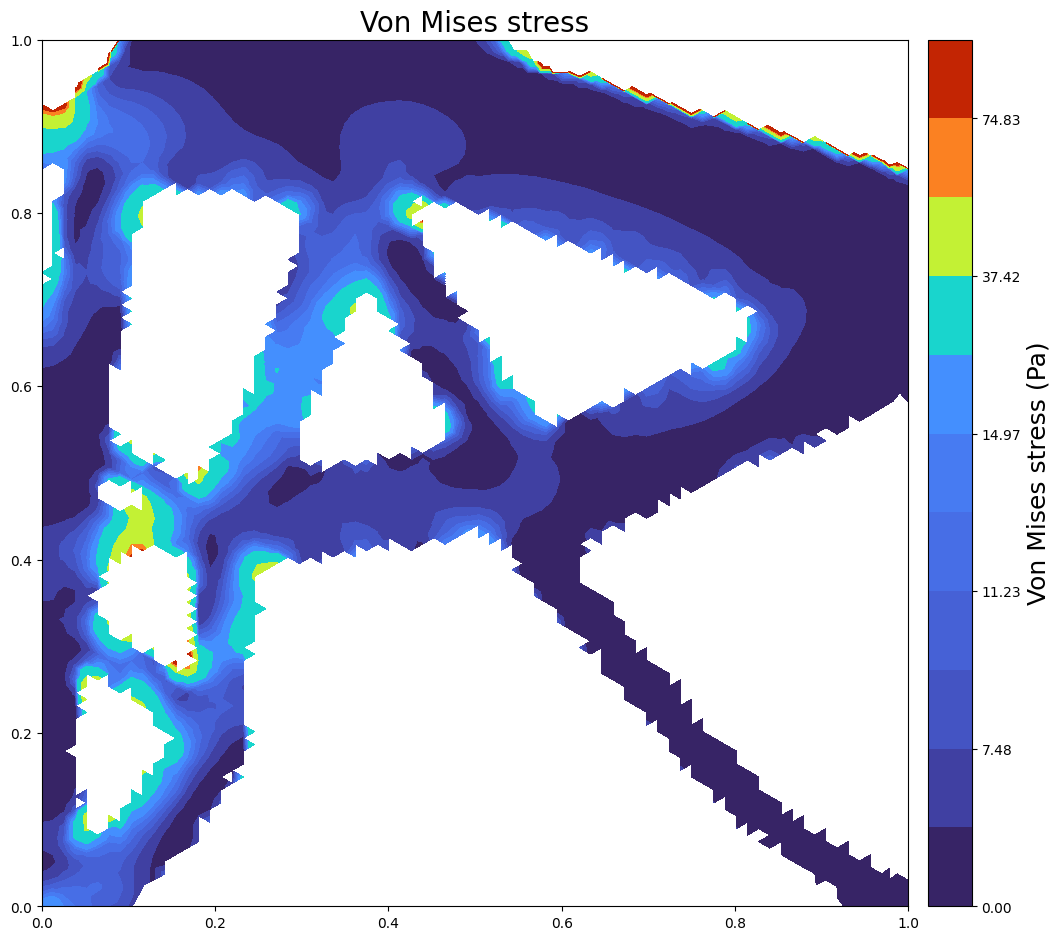

vf: 0.420270 | compliance: 293.355971 | max_stress: 19171.537491


Computing stresses: 100%|██████████| 10492/10492 [00:00<00:00, 116225.66it/s]


343.8844955642614 0.0006110547973233211


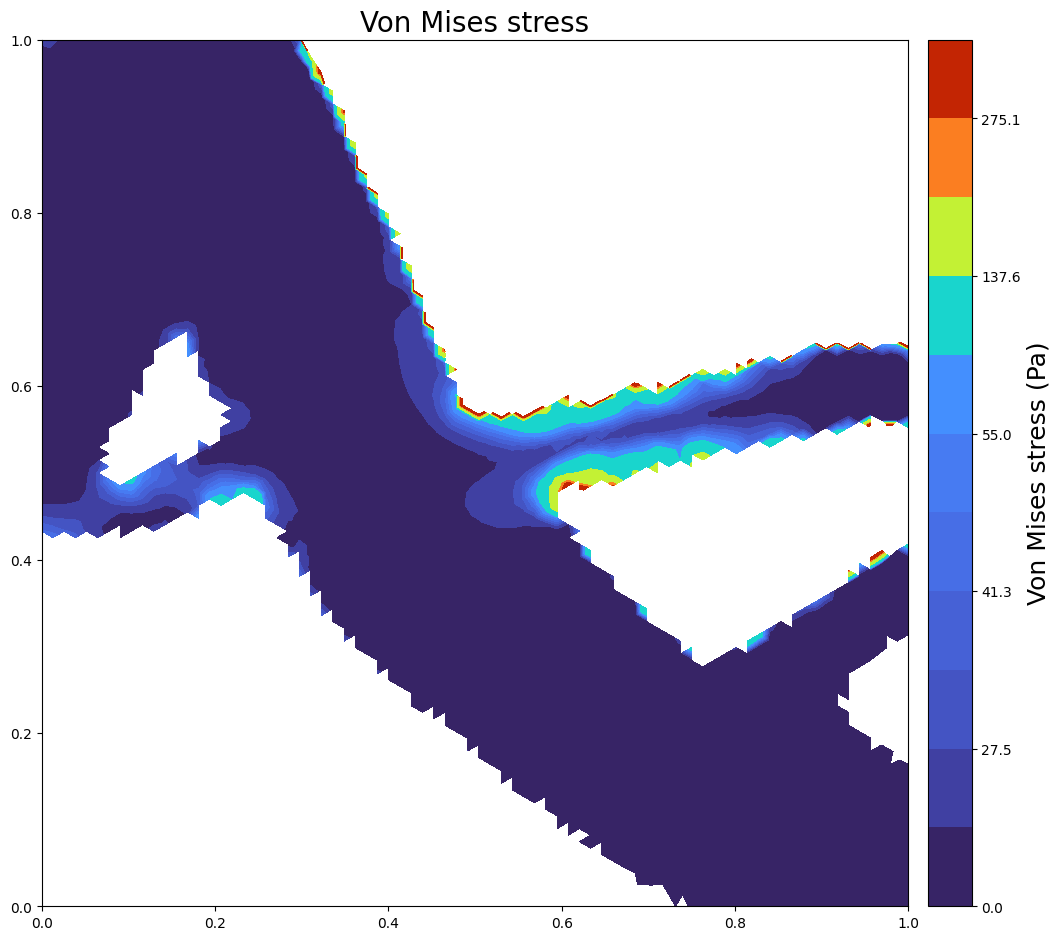

vf: 0.436065 | compliance: 1756.118452 | max_stress: 26207.561868


Computing stresses: 100%|██████████| 10492/10492 [00:00<00:00, 118315.86it/s]


172.47949655440166 0.3426491997677393


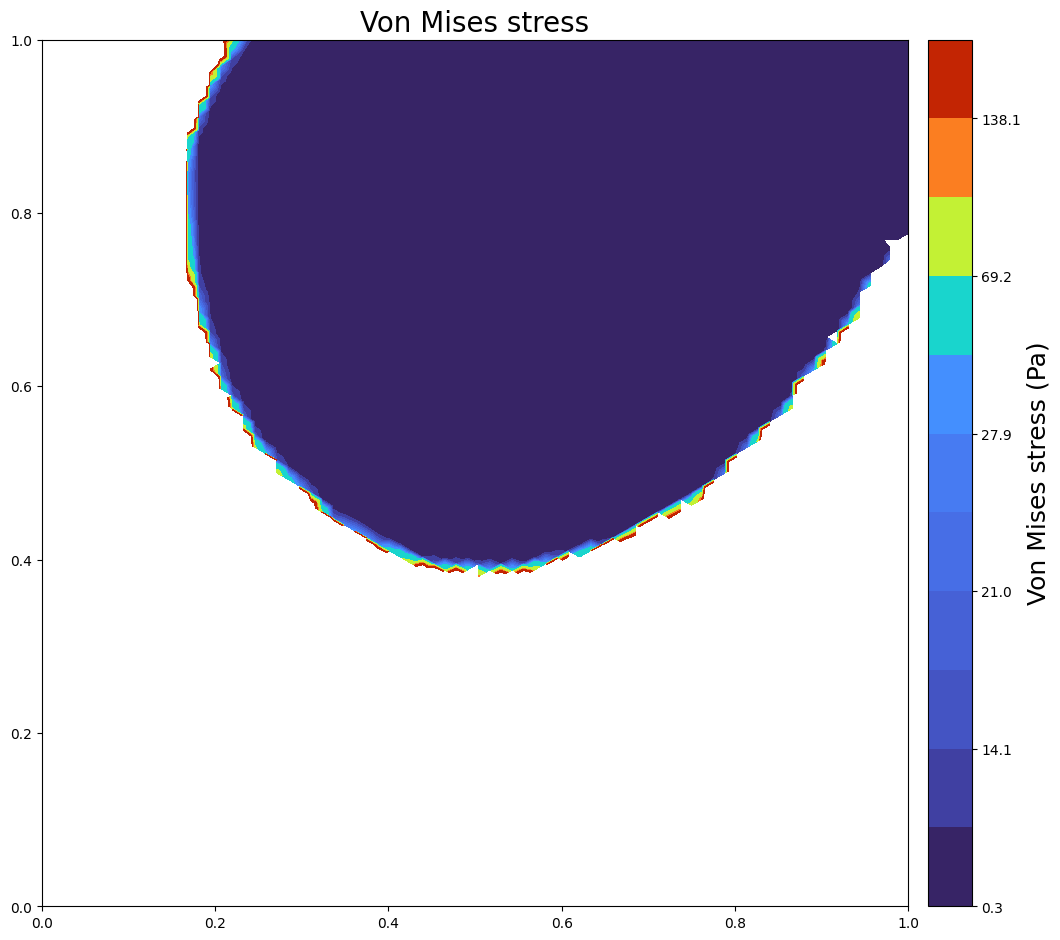

vf: 0.411931 | compliance: 9618.489576 | max_stress: 94739.754972


Computing stresses: 100%|██████████| 10492/10492 [00:00<00:00, 119221.70it/s]


93.4103753544866 0.0371785452639302


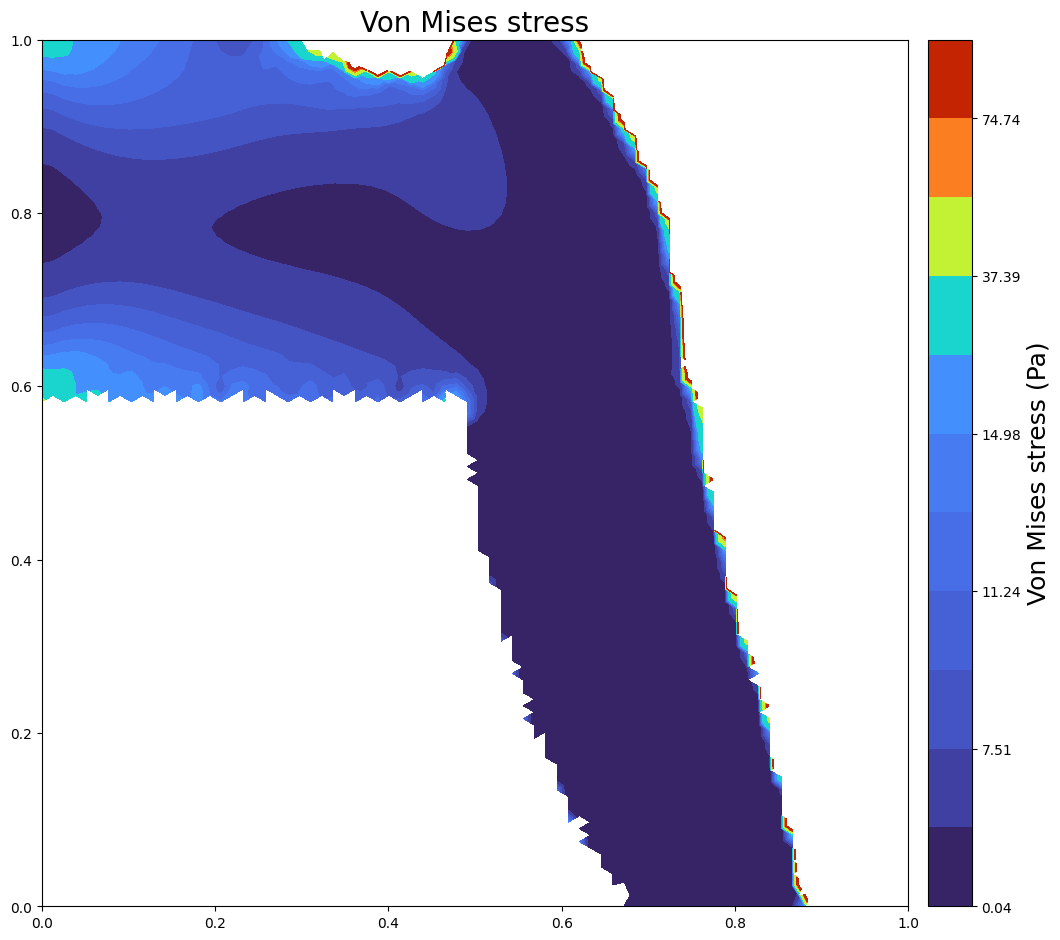

vf: 0.425837 | compliance: 985.380003 | max_stress: 22237.889996


In [41]:
vf_list = []
compliance_list = []
max_stress_list = []

for i in range(arr.shape[0]):
    TopOptimizer.load_solution_from_2d_tensor(f'../src/model_comparison/diffusion_solutions/{task2config[task_id]}_{i}.npy',
                                          v_flopping=v_flopping, k=8)
    vf, compliance, max_stress = TopOptimizer.print_metrics()
    vf_list.append(vf)
    compliance_list.append(compliance)
    max_stress_list.append(max_stress)

vf_list = np.array(vf_list)
compliance_list = np.array(compliance_list)
max_stress_list = np.array(max_stress_list)




In [42]:
root_dir = f'../src/model_comparison/{external_method}'
os.makedirs(root_dir, exist_ok=True)

metrics = {
    "vf": (vf_list.mean(), vf_list.std()),
    "compliance": (compliance_list.mean(), compliance_list.std(), compliance_list.min(), compliance_list.max()),
    "max_stress": (max_stress_list.mean(), max_stress_list.std(), max_stress_list.min(), max_stress_list.max())
}
filename_metrics = f"{root_dir}/{config_name}.json"
with open(filename_metrics, "w") as f:
    json.dump(metrics, f)